# Yelp Analysis of Cleveland, Ohio

* Yelp users usually gave a high rating to local businesses. Among all the reviewed business of Cleveland in Yelp: more than 200 businesses have at least a 4-star rating. The rating is high!


* The height of each word in wordcloud is an indication of frequency of occurrence of the word in the entire text. Words like mexican, american, bars, coffee and tea are frequently used in the reviews.


* Not just restaurants! Yelp reviews include plenty of categories of business. There are 100 unique categories in Yelp reviews and the top bussiness category which has highest review count of more than 8000 is American(new).


* The delivery services in Cleveland, Ohio are not doing really well. We got the results which showed that more than 350 businesses in Cleveland are not providing the delivery services at all. And only around 100 businesses are doing so.


* There is a positive relationship between the average household income and mean number of reviews.  The higher income households review more Yelp businesses.


* There is somehow some impact of price over the rating. We got a p-value of 0.001044 which clearly shows that our data is statistically significant.

In [3]:
#Import dependenies
import os
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.io.json import json_normalize
import requests
import json
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
from gmplot import gmplot
import time
import numpy as np
import folium as fl
from yelpapi import YelpAPI
from pprint import pprint
from API import api_key
import seaborn as sns
os.environ['PROJ_LIB'] = "/anaconda3/envs/test/share/proj"

In [4]:
#Get information using Yelp API from Yelp
url = 'https://api.yelp.com/v3/businesses/search'
offset = 0
API = api_key
headers = {'Authorization': 'bearer %s' % API}
business = []

for i in range(0, 500, 50):
    params = {'location': 'Cleveland, Ohio', 'offset': offset, 'limit': 50}
    response = requests.get(url, params=params, headers=headers)
    business.append(response.json())
    offset += 50
    
    if offset % 50 == 0:
        time.sleep(5)
        
business

[{'businesses': [{'id': 'J1RDyyPxhioqm8c_fi4P4Q',
    'alias': 'lola-cleveland',
    'name': 'Lola',
    'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-ENxIoteq2fj4OTgdg/o.jpg',
    'is_closed': False,
    'url': 'https://www.yelp.com/biz/lola-cleveland?adjust_creative=TshdU4XV3-ETjsHU3-ICtw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=TshdU4XV3-ETjsHU3-ICtw',
    'review_count': 981,
    'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
     {'alias': 'newamerican', 'title': 'American (New)'}],
    'rating': 4.0,
    'coordinates': {'latitude': 41.49883, 'longitude': -81.69035},
    'transactions': [],
    'price': '$$$',
    'location': {'address1': '2058 E 4th St',
     'address2': '',
     'address3': '',
     'city': 'Cleveland',
     'zip_code': '44115',
     'country': 'US',
     'state': 'OH',
     'display_address': ['2058 E 4th St', 'Cleveland, OH 44115']},
    'phone': '+12166215652',
    'display_phone': '(216) 621-5652',
    

In [5]:
#Create a dataframe
response = business[0]['businesses']
df = pd.DataFrame.from_dict(response)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lola-cleveland,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 41.49883, 'longitude': -81.69035}",(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,"{'address1': '2058 E 4th St', 'address2': '', ...",Lola,+12166215652,$$$,4.0,981,[],https://www.yelp.com/biz/lola-cleveland?adjust...
1,townhall-cleveland-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 41.485492, 'longitude': -81.703914}",(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,"{'address1': '1909 W 25th St', 'address2': '',...",Townhall,+12163449400,$$,4.0,993,[],https://www.yelp.com/biz/townhall-cleveland-2?...
2,l-albatros-cleveland,"[{'alias': 'french', 'title': 'French'}]","{'latitude': 41.5117439550152, 'longitude': -8...",(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,"{'address1': '11401 Bellflower Rd', 'address2'...",L'Albatros,+12167917880,$$$,4.5,604,[],https://www.yelp.com/biz/l-albatros-cleveland?...
3,slymans-restaurant-cleveland,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 41.51286, 'longitude': -81.67125}",(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,"{'address1': '3106 Saint Clair Ave NE', 'addre...",Slyman's Restaurant,+12166213760,$$,4.5,417,[],https://www.yelp.com/biz/slymans-restaurant-cl...
4,great-lakes-brewing-company-cleveland-4,"[{'alias': 'breweries', 'title': 'Breweries'},...","{'latitude': 41.4844102, 'longitude': -81.7043...",(216) 771-4404,2944.089481,meXjqyhTNLFmknY39y2sMg,https://s3-media1.fl.yelpcdn.com/bphoto/RHNLaz...,False,"{'address1': '2516 Market Ave', 'address2': ''...",Great Lakes Brewing Company,+12167714404,$$,4.0,852,[],https://www.yelp.com/biz/great-lakes-brewing-c...


In [6]:
#Concat all the dataframes into one
full_data = []

for i in business:
    full_data = full_data + i['businesses']

df = pd.DataFrame.from_dict(full_data)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,lola-cleveland,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...","{'latitude': 41.49883, 'longitude': -81.69035}",(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,"{'address1': '2058 E 4th St', 'address2': '', ...",Lola,+12166215652,$$$,4.0,981,[],https://www.yelp.com/biz/lola-cleveland?adjust...
1,townhall-cleveland-2,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 41.485492, 'longitude': -81.703914}",(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,"{'address1': '1909 W 25th St', 'address2': '',...",Townhall,+12163449400,$$,4.0,993,[],https://www.yelp.com/biz/townhall-cleveland-2?...
2,l-albatros-cleveland,"[{'alias': 'french', 'title': 'French'}]","{'latitude': 41.5117439550152, 'longitude': -8...",(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,"{'address1': '11401 Bellflower Rd', 'address2'...",L'Albatros,+12167917880,$$$,4.5,604,[],https://www.yelp.com/biz/l-albatros-cleveland?...
3,slymans-restaurant-cleveland,"[{'alias': 'tradamerican', 'title': 'American ...","{'latitude': 41.51286, 'longitude': -81.67125}",(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,"{'address1': '3106 Saint Clair Ave NE', 'addre...",Slyman's Restaurant,+12166213760,$$,4.5,417,[],https://www.yelp.com/biz/slymans-restaurant-cl...
4,great-lakes-brewing-company-cleveland-4,"[{'alias': 'breweries', 'title': 'Breweries'},...","{'latitude': 41.4844102, 'longitude': -81.7043...",(216) 771-4404,2944.089481,meXjqyhTNLFmknY39y2sMg,https://s3-media1.fl.yelpcdn.com/bphoto/RHNLaz...,False,"{'address1': '2516 Market Ave', 'address2': ''...",Great Lakes Brewing Company,+12167714404,$$,4.0,852,[],https://www.yelp.com/biz/great-lakes-brewing-c...


In [7]:
#Clean the dataframe from dictionaries
idx = 0
lats = []
lngs = []
Bus_titles = []
ZIPS = []
Trans = []
Prices = []

for i, r in df.iterrows():
    lat = r["coordinates"]["latitude"]
    lng = r["coordinates"]["longitude"]
    titles = r["categories"][0]["title"]
    ZIP = r["location"]["zip_code"]
    
    if len(r['transactions']) == 0:
        Tran = "NO Delivery"
    else:
        Tran = "Delivery"
        
    if r["price"] == str("$"):
        price = 1
    elif r["price"] == str("$$"):
        price = 2
    else: price = 3    
    
    
    lats.append(lat)
    lngs.append(lng)
    Bus_titles.append(titles)
    ZIPS.append(ZIP)
    Trans.append(Tran)
    Prices.append(price)
    
    
#create a dataframe for cleaned column    
clean_df = pd.DataFrame(data={'Categories': Bus_titles, 'latitude': lats,'longitude':lngs, 'zip_code': ZIPS , 'Delivery': Trans,
                              'Price':Prices})
clean_df.head()

,Categories,latitude,longitude,zip_code,Delivery,Price
0,Wine Bars,41.498830,-81.690350,44115,NO Delivery,3
1,American (New),41.485492,-81.703914,44113,NO Delivery,2
2,French,41.511744,-81.606395,44106,NO Delivery,3
3,American (Traditional),41.512860,-81.671250,44114,NO Delivery,2
4,Breweries,41.484410,-81.704395,44113,NO Delivery,2


In [8]:
#Add the cleaned columns into datframe and drop the unnecessary columns
concat_df = pd.concat([df,clean_df], axis=1)

#Drop the columns
yelp = concat_df.drop(columns = ['coordinates', 'categories', 'location', 'transactions', 'price'])
yelp.head()

,alias,display_phone,distance,id,image_url,is_closed,name,phone,rating,review_count,url,Categories,latitude,longitude,zip_code,Delivery,Price
0,lola-cleveland,(216) 621-5652,3191.079270,J1RDyyPxhioqm8c_fi4P4Q,https://s3-media1.fl.yelpcdn.com/bphoto/XuGT-E...,False,Lola,+12166215652,4.0,981,https://www.yelp.com/biz/lola-cleveland?adjust...,Wine Bars,41.498830,-81.690350,44115,NO Delivery,3
1,townhall-cleveland-2,(216) 344-9400,2951.385340,LNsZJP6jZ11e0tDljOLPiQ,https://s3-media4.fl.yelpcdn.com/bphoto/ycqFgv...,False,Townhall,+12163449400,4.0,993,https://www.yelp.com/biz/townhall-cleveland-2?...,American (New),41.485492,-81.703914,44113,NO Delivery,2
2,l-albatros-cleveland,(216) 791-7880,6953.412053,SzcCJJmreMlWCsNjupdVAA,https://s3-media4.fl.yelpcdn.com/bphoto/QpVBtp...,False,L'Albatros,+12167917880,4.5,604,https://www.yelp.com/biz/l-albatros-cleveland?...,French,41.511744,-81.606395,44106,NO Delivery,3
3,slymans-restaurant-cleveland,(216) 621-3760,4387.852814,1veVZUawy7IhIc5oDpRRQA,https://s3-media2.fl.yelpcdn.com/bphoto/rz2ST-...,False,Slyman's Restaurant,+12166213760,4.5,417,https://www.yelp.com/biz/slymans-restaurant-cl...,American (Traditional),41.512860,-81.671250,44114,NO Delivery,2
4,great-lakes-brewing-company-cleveland-4,(216) 771-4404,2944.089481,meXjqyhTNLFmknY39y2sMg,https://s3-media1.fl.yelpcdn.com/bphoto/RHNLaz...,False,Great Lakes Brewing Company,+12167714404,4.0,852,https://www.yelp.com/biz/great-lakes-brewing-c...,Breweries,41.484410,-81.704395,44113,NO Delivery,2


In [60]:
#Google map for 500 cleveland businesses
gmap = gmplot.GoogleMapPlotter(41.4, -81.7, 13)
gmap.scatter(yelp['latitude'], yelp['longitude'], '#3B0B39', size=40, marker=False)
gmap.draw("my_map.html")
gmap

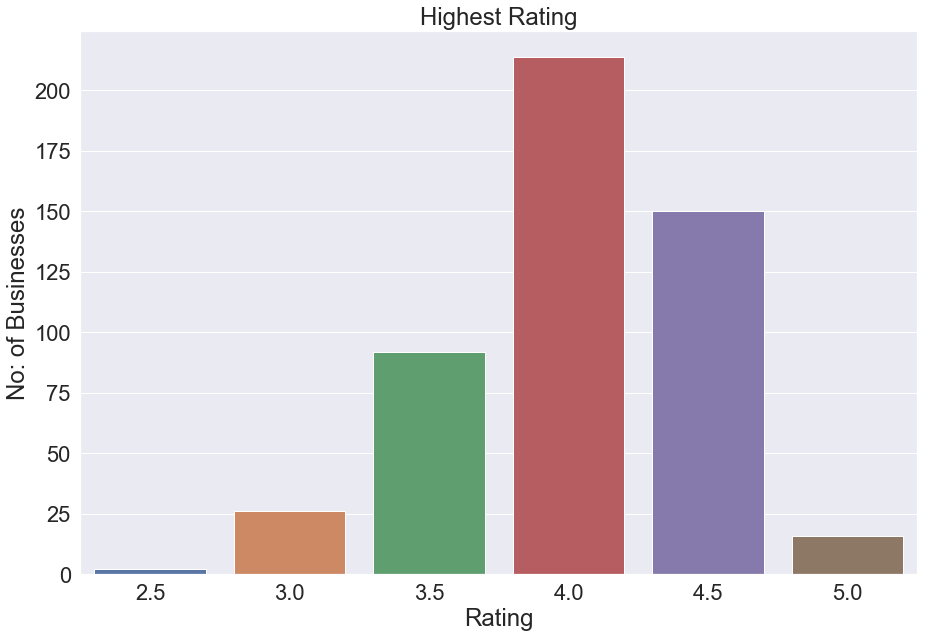

In [61]:
#Use a plot to visualize the frequency of rating
plt.figure(figsize=(15,10))
a = sns.countplot(x='rating',data=yelp);
a.set_title('Highest Rating')
a.set_ylabel('No: of Businesses')
a.set_xlabel('Rating');

#save the figure
fig.savefig("rating.png")

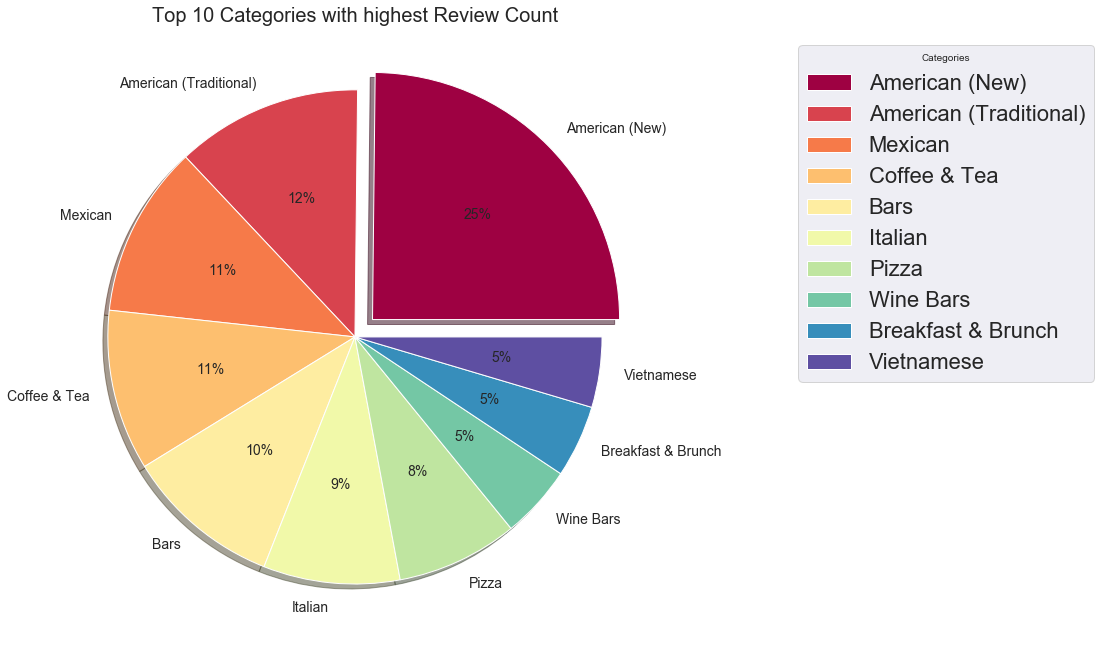

In [62]:
#Data for categories and review count
grouped_yelp = yelp.groupby(['Categories'], as_index=False).sum()
review = grouped_yelp.sort_values("review_count", ascending=False)
df_1 = review['Categories'].iloc[0:10]
df_2 = review['review_count'].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title('Top 10 Categories with highest Review Count', fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct='%.0f%%', shadow=True, colors=colors, explode=explode, textprops={'fontsize': 14})

#Create a legend
plt.legend(df_1,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1.2, 0.2, 0, 1))


#save the figure
plt.savefig("categories.png")


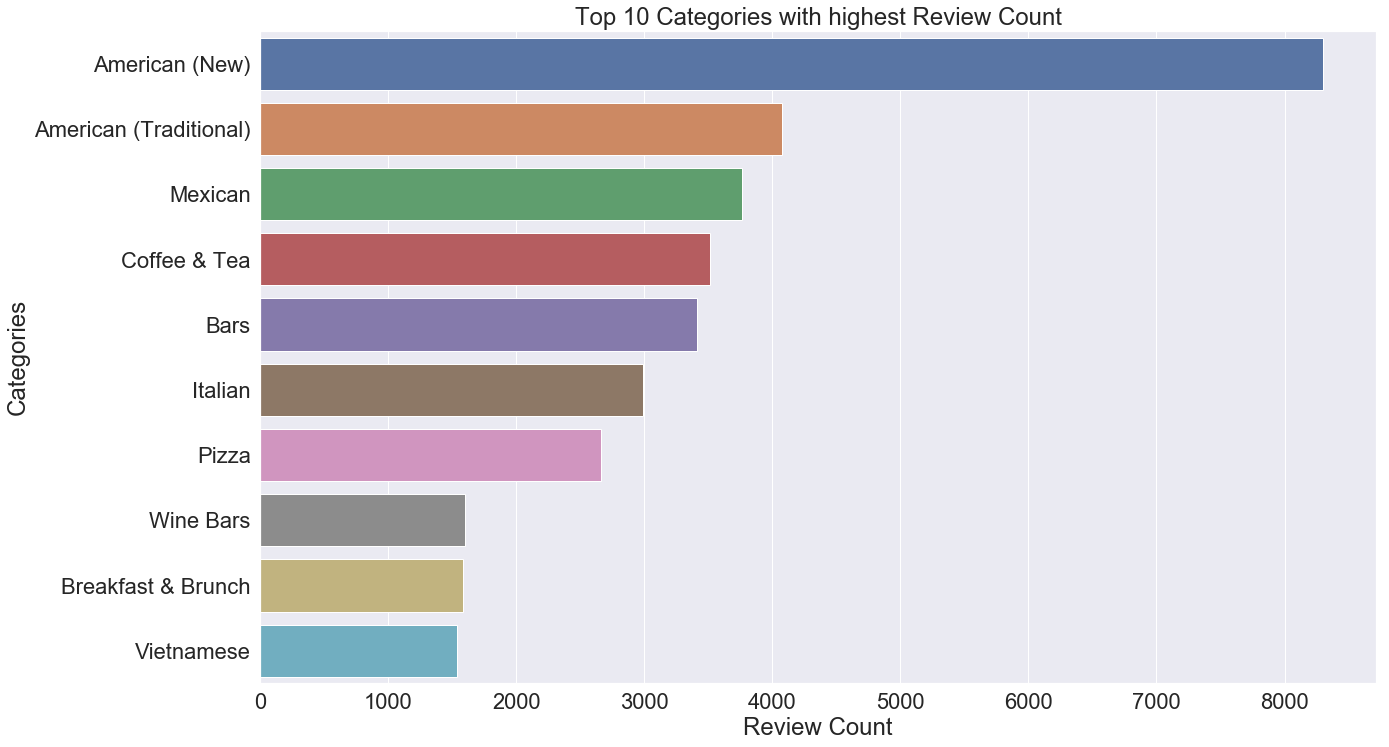

In [63]:
#Create a bar plot to visualize top categories and review count
plt.figure(figsize=(20,12))
sns.set(font_scale=2)
f = sns.barplot( x = 'review_count', y= 'Categories', data = review.iloc[0:10])
f.set_title('Top 10 Categories with highest Review Count')
f.set_ylabel('Categories')
f.set_xlabel('Review Count');

#save the figure
plt.savefig("10_categories.png")

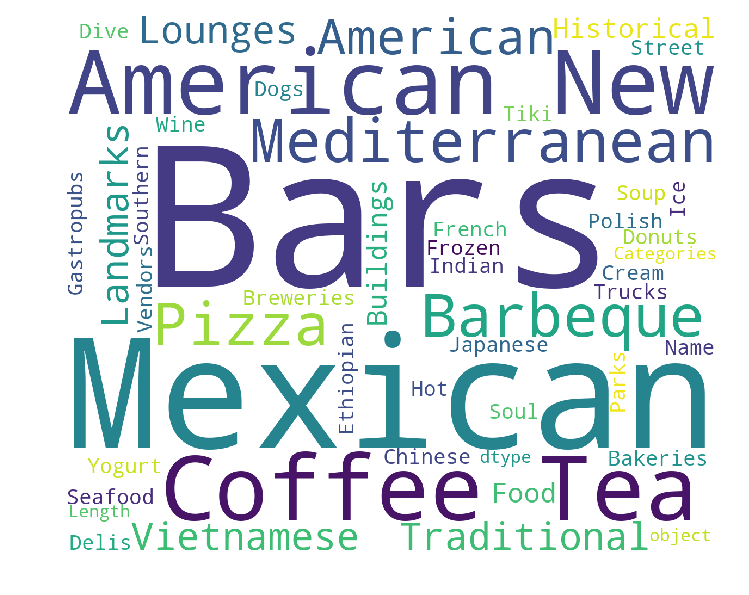

In [64]:
#Frequently used words in the reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(12,10))

wordcloud = WordCloud(background_color='white',
                          width=1200,
                      stopwords = STOPWORDS,
                          height=1000
                         ).generate(str(yelp['Categories']))


plt.imshow(wordcloud)
plt.axis('off');


#save the figure
plt.savefig("word_cloud.png")

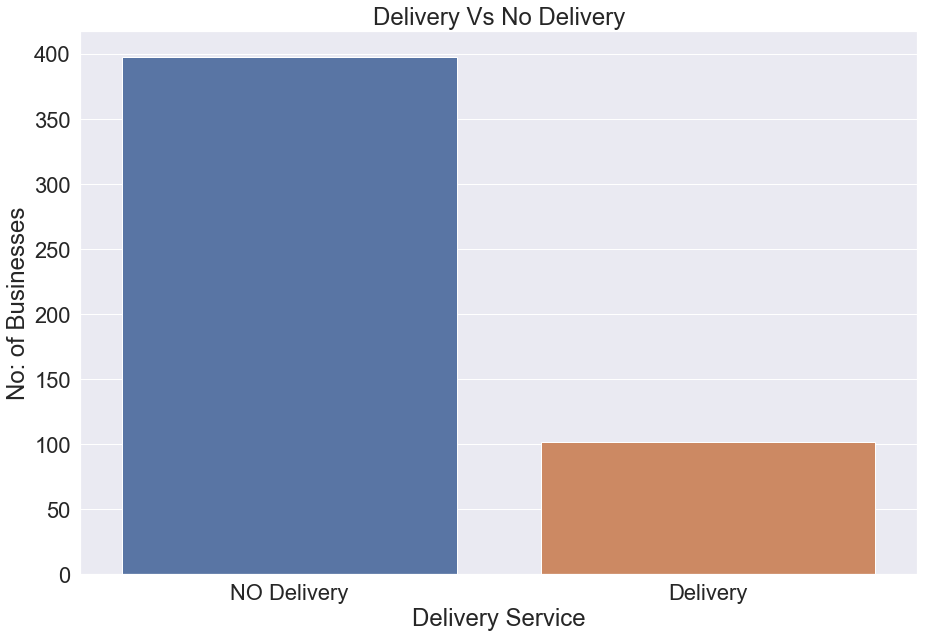

In [65]:
#Create a bar plot to visulaize the delivery and no delivery data
plt.figure(figsize=(15,10))
s = sns.countplot(x='Delivery',data=yelp);
s.set_title('Delivery Vs No Delivery')
s.set_ylabel('No: of Businesses')
s.set_xlabel('Delivery Service');

#save the figure
plt.savefig("delivery.png")

In [66]:
#Groupby data on zip code level and calculate the mean review count 
group_df = yelp[["zip_code", "review_count"]]
group_df = group_df.groupby(by="zip_code", as_index=False).mean()
mean_review = group_df['review_count']
zip_code = group_df['zip_code']
group_summary = pd.DataFrame ({"zip_code":zip_code, "Mean Review": mean_review})
group_summary['zip_code']=group_summary['zip_code'].apply(int)

#read the CSV file, clean it and merge it with the zip code file
file = "Avg_Income_by_zip.csv"
Censusdata_df = pd.read_csv(file)
Censusdata_df['zip_code']=Censusdata_df['zip_code'].apply(int)
Censusdata_df.set_index('zip_code', inplace=True)
del Censusdata_df['Attribute']
merge_table = pd.merge(Censusdata_df, group_summary, on="zip_code", how="inner")
merge_table[['Avg_Income_by_House']] = merge_table[['Avg_Income_by_House']].replace('[\$,]','',regex=True).astype(float)
merge_table.head()

,zip_code,Avg_Income_by_House,Mean Review
0,44102,39459.0,109.307692
1,44103,32668.0,38.714286
2,44105,40175.0,34.500000
3,44106,55977.0,130.043478
4,44107,67096.0,268.380952


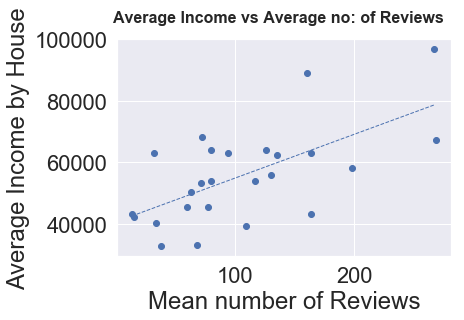

In [67]:
#Create a linear regression plot to see the relationship between mean review and average income by house
x = merge_table['Mean Review']
y = merge_table['Avg_Income_by_House']

max_mean = merge_table['Mean Review'].max()
min_mean = merge_table['Mean Review'].min()

best_fit_x = pd.Series([i for i in range(int(min_mean), int(max_mean))])

(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * best_fit_x + intercept

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x,y)
vc_fit = vc_slope * range(100) + vc_int

fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle("Average Income vs Average no: of Reviews", fontsize=16, fontweight="bold")

ax1.scatter(x, y)
ax1.plot(best_fit_x, fit, "b--", linewidth=1)
ax1.set_ylabel("Average Income by House")
ax1.set_xlabel("Mean number of Reviews")

#save the figure
plt.savefig("income.png")

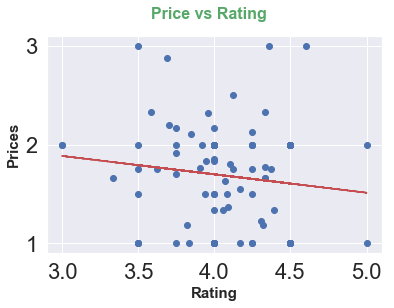

<Figure size 432x288 with 0 Axes>

In [68]:
#groupby the data on categories and calculate the mean price and rating
ab = yelp.groupby(['Categories'])['Price', 'rating'].mean()
cd = pd.DataFrame(ab)

#create a linear regression plot to see the relationship between price and rating
x = cd['rating']
y = cd['Price']
slope, intercept,r, p, std_err = stats.linregress(x, y)
fit = slope * x + intercept

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'r--')
fig.suptitle("Price vs Rating", fontsize=16, fontweight="bold" , color = "G")

plt.xlabel ("Rating",fontsize = 15, fontweight="bold")
plt.ylabel ("Prices" , fontsize = 15, fontweight="bold" )

plt.show()

#save the figure
plt.savefig("price.png")

F_onewayResult(statistic=6.9600643515758138, pvalue=0.0010443327401511756)

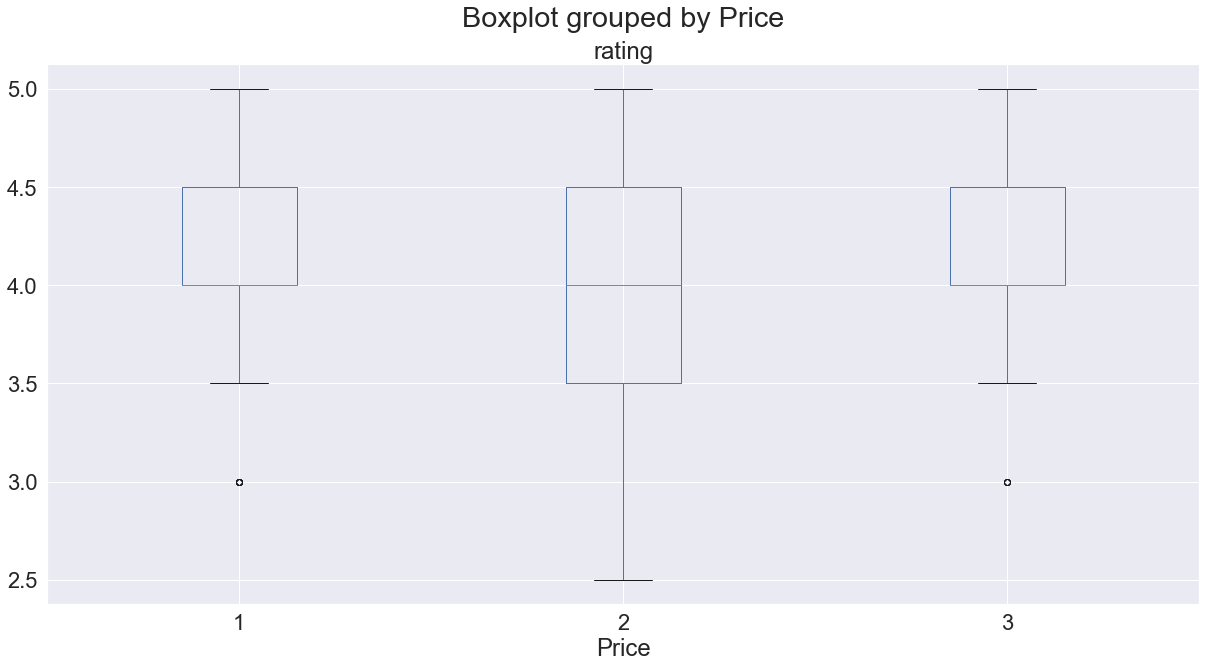

In [69]:
#create a box plot using ANOVA
yelp.boxplot("rating", by="Price", figsize=(20, 10))
group1 = df[yelp["Price"] == 1]["rating"]
group2 = df[yelp["Price"] == 2]["rating"]
group3 = df[yelp["Price"] == 3]["rating"]
stats.f_oneway(group1, group2, group3)

#save the figure
#plt.savefig("boxplot.png")